# Retrieving Images and Searching Using Image Descriptors

In this chapter, features of image will be extracted in form of descriptors. This helps to enable image based searches and to stitch two images together to obtain an ew larger image. Also, this gives us the ability to express the image in a very low number of features. So, the whole image pixels reduced into a set of keypoints. Those keypoints, enable us to find them gain in another image for the same scene but picked from different angle. This helps in data association task.


## Feature Detection Algorithms

There are many algorithms in opencv which can be used to detect features in the image. Some of these features use corner to detect features and others use blobs "key-points".

## Algorithms Use Corneres to Detect Feature

### CornerHarris Algorithm
This Algorithm concentrate to detect corners where two edges meet. Also, where there is a rapid cahnge of the intensity in the two directions.
In the following we notice no

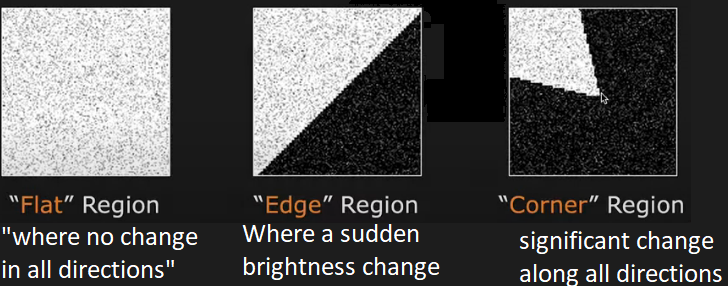

Corner Detection looks like Edge Detection. It is based on using image drivative to obtain corners. "Sobel filter is used to obtain the gradient in x,y"

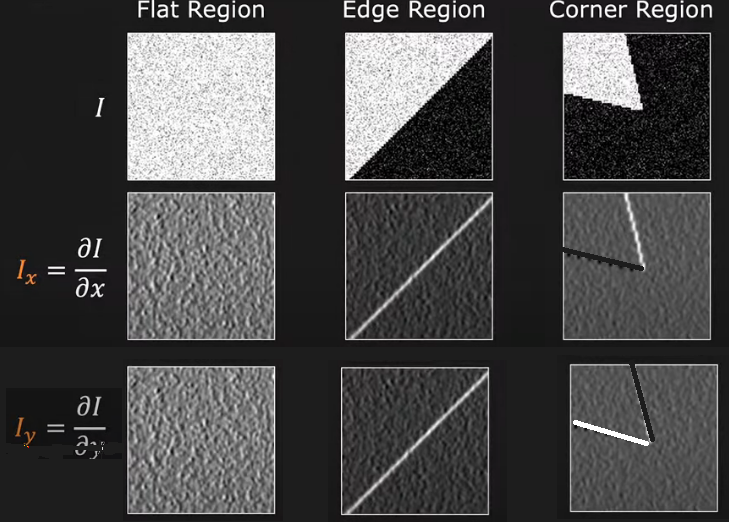

We notice that 
- In case of flat region no drivative, 
- In case of edge it has a positive gradient along the edge and the same for y direction,
- In case of corner, there is a strong +ve gradient in x direction and stron gradient in y direction. 

If we try to classify the distribution of gradient then we notice the following,
- In case of flat, the distribution looks like a small circle, no change in x or y
- In case of edge, the distribution looks like a small circle, plus a big a linear change in x and y along the edge.
- In case of corner, the distribution looks like a small circle, plus a big change in x while chnge in y is small or negative,  and a big change in y while chnge in x is small or negative.

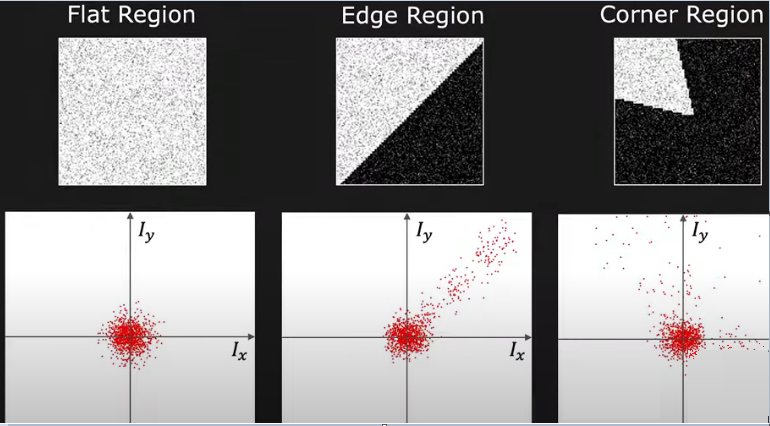



We need to parameterize it, so we fit it into circle or ellipse.

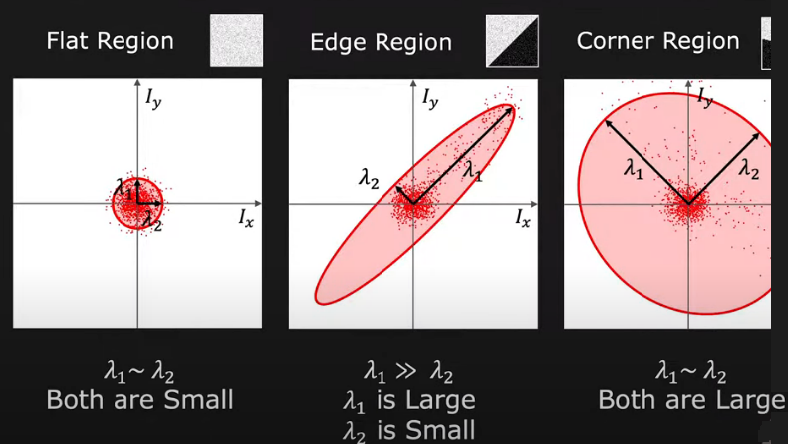

We notice the following,
- If there is a flat, then λ1 = λ2, Both λ1, λ2 are small.
- If there is an edge, then λ1 >> λ2 or vice versa where λ2 >> λ1.
- If there is a corner, then λ1 = λ2, Both λ1, λ2 are large.

This is what's Harris corner says:

$ R = λ1 * λ2  – k (λ1 + λ2)^2$

k = (from 0.04 to 0.06)

After obtaining the R image as above relationship assume, There are many corners are qualified so you should do the non maximal supression to retain only with maximum value. This is done by sliding a window on the R image, retain only the center of the R image if it has maximum value otherwise remove it.

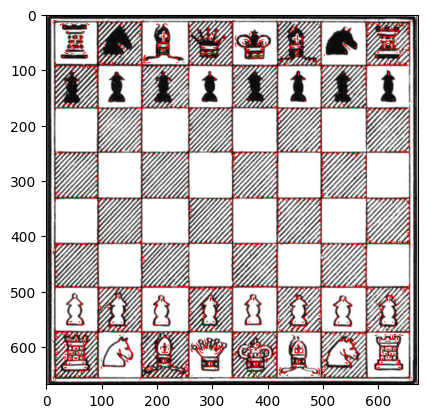

In [1]:
import matplotlib.pyplot as plt

import cv2 as cv
import numpy as np
img = cv.imread('images/chessBoard.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

'''
img - Input image. It should be grayscale and float32 type.

blockSize - It is the size of neighbourhood considered for corner detection, the smaller the number, 
the smaller markers indicating the corners.

ksize - kernel size of the Sobel derivative used. It defines how sensitive corner detection is. It must 
be between 3 and 31 and be an odd value. At value 3, all those diagonal lines in the 
black squares of the chessboard will register as corners when they touch the border 
of the square. At 23, only the corners of each square will be detected as corners.

k - Harris detector free parameter in the equation.
'''

dst = cv.cornerHarris(gray, 2, 27, 0.04)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.02 * dst.max()] = [255, 0, 0] 

#Show the image
plt.imshow(img)


In the above image, most of corners were detected. There are some of CornerHarris advantages and disadvantages: Advantages:

<b>advantages:
- It can detect corners even if the image is rotated.

<b>Disadvantages:
- CornerHarris can't work well in case of changing the image scale. Assume the image scale is reduced, then the corners can't be detected well using the CornerHarris "because of changing the sensitivity of the algorithm". 

So, we need another algorithm can work with multi-scale images like the SIFT "uses key-points"

## Algorithms Use Key-points to Detect Feature

### Scale Invariant Feature Transform "SIFT"

Let's summarize SIFT algorithm stages, its importance, its procedure for matching or obtaining keypoints descriptors.

<b> What is the SIFT procedure?
SIFT has two stages:
- Detector to define where are the local features?
- Descriptor to define how to describe features?

<b> Why SIFT is preferred as feature extraction method?
- Scale invariant
- Rotation invariant
- Partially Illumination invariant.
- Partially Robust to affine transformation (Affine mapping is a mapping method that preserves 
  points, lines and planes. According to an affine mapping, a set of parallel lines remains parallel.)
- Can detect landmarks from different angels and distances with different illumination.


<b> What are the steps SIFT?
    
<b> - Create the scale space images.
    
       1- Create 5 blurred images.
    
       2- For each blurred image create 4 scales "Octave".
    
![image.png](attachment:image.png)
    
<b> - Calculate the difference of Gaussian.
    
       Obtaining the difference between two blurred images with different sigma (different sigma means different blurred          ratio, higher sigma value, higher blurring). 
    
       In our example we have 5 blurred image in each scale so DOG has only 4 images as shown below
    
![image-7.png](attachment:image-7.png)    
      
    
<b> - Key point Detection.
    
       1- After finding the DOG, then find the local minima or maxima in the output of DOG.
    
       2- Compare each pixel in a grid 3 by 3 with its neighbors or with a grid above or below it.
    
       3- If this value has the lowest of greatest value, then it is key-point.

![image-3.png](attachment:image-3.png)
    
<b> - Key point elimination.
    
       Using the threshold technique or harries edge detection. There some key-points come from edges, or low contrast and 
       they should be eliminated.
    
<b> - Key point orientation assignment.
    
       1- After obtaining the key-points, then the orientation of each key-point is calculated. 
    
       2- To calculate the orientation of each key-point in 16 by 16 region of pixel around each key-point is considered              and the gradient theta and magnitude will be calculated for each pixel in this region. 
    
       3- There are many values output of this step, we consider only the maximum value of the region to represent the                theta of this key-point. 
    
   <pre><b>How is this carried out?</b></pre> Via histogram.
    
       - This histogram has 36 bins for 360. Each bin represent 10 degrees.
       - The orientation of the key-point is the bin that has the maximum peak. (we have hist for each key-point)

<b> - Key point Descriptor.
    
       - The output of the SIFT algorithm is the vector for each key-point called descriptor.
       - These descriptor size is 128, it has 128 value describing the key-point. 

   <pre><b>How to obtain the key-point descriptor?</b></pre>
    
       We have a region 16 by 16 around the key-point. We will divide the 16 by 16 to 16 region each region is (4 by 4). 
       For each region 4 by 4, the orientation will be calculated and represented by 8 values histogram as follows,

![image-6.png](attachment:image-6.png)
<pre>*Source: [Cyrill Stachniss, 2014 cyrill.stachniss@igg.uni-bonn.de]</pre>  
    
<b> - Key Point Matching.
    
       · The outputs of SIFT are key-points and descriptors.
       · If we have image a, b. We start to compare the key-point descriptor of A to all key-points descriptors in image B.
       · The descriptor with minimum distance will be considered. This can be done by KNN, FLANN-based matching, brute              force Matching


![image-8.png](attachment:image-8.png)



In [2]:
img = cv.imread('./images/surprised2.JPG', cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


In [3]:
# create a SIFT object and compute the grayscale image
sift = cv.SIFT_create()
keypoints, descriptor = sift.detectAndCompute(gray,None)
img_withkeypoints = img.copy()

img_withkeypoints = cv.drawKeypoints(image=img, outImage=img_withkeypoints, keypoints = keypoints, 
                       flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color = (51, 163, 236))



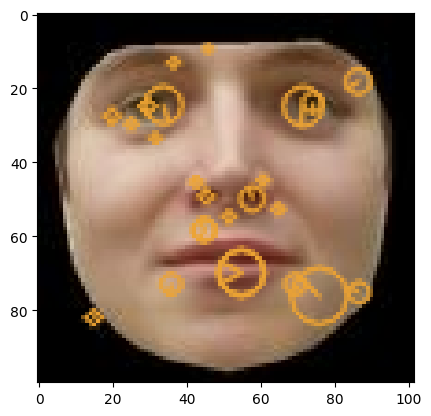

In [4]:
plt.imshow(img_withkeypoints[:,:,::-1])


### SURF (Speeded-Up Robust Features)

<B>Overview:
    
SURF is an improvement over SIFT. It is designed to be faster and more efficient while maintaining robustness and invariance to scale and rotation.

<B>Steps in SURF Algorithm:

<pre><B>Integral Images:</B></pre>

<pre>SURF uses integral images to speed up the convolution operations required for feature detection.
Integral images allow for the quick computation of box filters, which approximate Gaussian smoothing.</pre>

<pre><B>Hessian Matrix-Based Key Point Detection:</B></pre>

<pre>SURF detects key points using the determinant of the Hessian matrix.
The Hessian matrix captures the second-order partial derivatives of the image intensity.
SURF approximates the Hessian matrix using box filters for efficiency.</pre>

<pre><B>Scale Space Representation:</B></pre>

<pre>SURF constructs a scale-space representation by varying the size of the box filters instead of downscaling the image.
This method is computationally efficient and robust to changes in scale.</pre>

<pre><B>Orientation Assignment:</B></pre>

<pre>For each detected key point, SURF assigns an orientation based on the dominant gradient direction in the local neighborhood.</pre>
<pre>This is achieved by computing Haar wavelet responses in the x and y directions and determining the dominant orientation.</pre>

<pre><B>Descriptor Computation:</B></pre>

<pre>SURF creates a descriptor for each key point by analyzing the distribution of gradient directions in a region around the key point.</pre>
    
<pre>The region is divided into 4x4 subregions, and the gradients in these subregions are summed up to create a feature vector.</pre>
    
<pre>The resulting descriptor is typically 64-dimensional (4x4 subregions with 4 values each: sum of dx, sum of dy, sum of |dx|, and sum of |dy|).</pre>
    
<pre><B>Key Point Matching:</B></pre>

<pre>Descriptors from different images are compared to find matching key points using a distance metric like Euclidean distance.</pre>
    
<B>Note, Surf algorithm doesn't exist in OpenCv

In [5]:

'''
The higher the threshold, the less features identified, so play around with the values 
until you reach an optimal detection
'''
surf = cv.xfeatures2d.SURF_create(hessianThreshold=400)

# Detect key points and compute descriptors
keypoints, descriptors = surf.detectAndCompute(gray, None)

# Draw key points on the image
img_withkeypoints = cv.drawKeypoints(img, keypoints, None, (255, 0, 0), 4)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1028: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'


SURF is not available in OpenCV
## ORB ( Oriented FAST and Rotated BRIEF)

ORB (Oriented FAST and Rotated BRIEF) is a feature detection algorithm in computer vision used to identify key points and compute descriptors for these key points in images. It is designed to be fast and efficient, making it suitable for real-time applications such as augmented reality, robotics, and image stitching. ORB combines the FAST key point detector and the BRIEF descriptor with some modifications to enhance its performance.

It is not very complex to compute like SIFT (SIFT need DOG, Histograms of gradients, discriptor 128 value) while ORB is easy to compute and compare (its discriptor is a short bianry string. It is not floating numbers, or vector of values)

<b> Key Concepts of ORB</b> 
    
<b>FAST Key Point Detection:</b>  FAST (Features from Accelerated Segment Test) is used to detect key points in an image. FAST identifies points with high intensity variation in their local neighborhood, which are likely to be interesting features.

<b>Harris Corner Measure:</b>  To ensure that the key points are well distributed and stable, ORB uses the Harris corner measure to rank the key points detected by FAST.

<b>Orientation Assignment:</b>  ORB assigns an orientation to each key point based on the intensity centroid of the region around the key point. This helps make the algorithm rotation invariant.

<b>BRIEF Descriptor:</b>  BRIEF (Binary Robust Independent Elementary Features) is used to compute a binary descriptor for each key point. The descriptor is created by comparing the intensities of pairs of pixels in the local neighborhood of the key point.

<b>Rotated BRIEF:</b>  To make BRIEF descriptors rotation invariant, ORB rotates the BRIEF descriptor according to the orientation assigned to the key point.

<b>Scale Invariance:</b>  ORB uses a multi-scale pyramid to detect key points at different scales, ensuring that it can handle images with varying sizes.   
    
<b>Advantages of ORB</b> 
- Efficiency: ORB is computationally efficient and well-suited for real-time applications.
- Robustness: It is robust to changes in scale, rotation, and lighting conditions.
- Binary Descriptors: The binary nature of BRIEF descriptors makes them fast to compute and compare.  

<b>Applications of ORB</b>

- Image Stitching: Combining multiple images to create a panorama.
- Object Recognition: Identifying objects within images.
- Augmented Reality: Overlaying virtual objects on the real world in a consistent manner.
- Robotics: Navigating and understanding the environment using visual input.
- Visual SLAM (Simultaneous Localization and Mapping): Creating maps and tracking location in real-time for autonomous vehicles and robots.

In [6]:
# Initialize ORB detector
orb = cv.ORB_create()

# Detect key points and compute descriptors
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Draw key points on the image
output_image = cv.drawKeypoints(img, keypoints, None, color=(0, 255, 0))


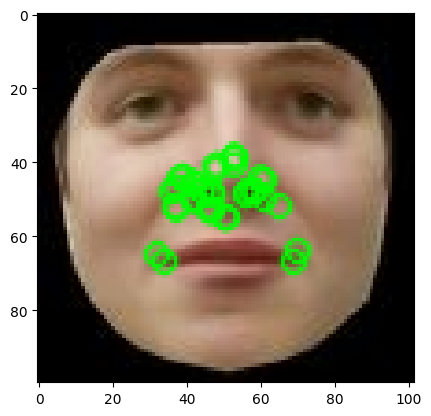

In [7]:
plt.imshow(output_image[:,:,::-1])


We notice that the SIFT algorithm above can detect more features more than the ORB.

## Matching Algorithms
### Brute-Force Matching

It is a straightforward method used in computer vision for matching key point descriptors between two images. It involves comparing each descriptor from one set with all descriptors in another set to find the best.

<b>Brute-Force Steps</b>

<b>1.Brute-Force Matching:</b>

For each descriptor in the first image, compute the distance to every descriptor in the second image.
Find the descriptor in the second image with the minimum distance to the current descriptor in the first image. Distance can be calculated as:

Euclidean Distance: Suitable for descriptors like SIFT and SURF.

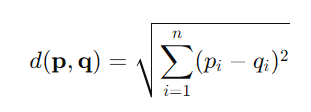

 
Hamming Distance: Suitable for binary descriptors like ORB.
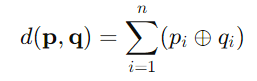

where ⊕ denotes the XOR operation.


<b>2.Filtering Matches (Optional):</b>

<b>Cross-Check:</b> Ensure that the best match is mutual. If descriptor A in image 1 matches with descriptor B in image 2, then descriptor B should also match with descriptor A.

<b>Ratio Test:</b> Proposed by David Lowe in SIFT, this test helps in removing ambiguous matches. For each descriptor, if the ratio of the distance of the closest match to the second-closest match is below a threshold (typically 0.75), it is considered a good match.




(< cv2.DMatch 00000165495BF910>, < cv2.DMatch 0000016545F53530>, < cv2.DMatch 0000016545F538F0>, < cv2.DMatch 00000165496B8730>, < cv2.DMatch 00000165496B8810>, < cv2.DMatch 00000165496B8770>, < cv2.DMatch 00000165496B8CD0>, < cv2.DMatch 00000165496B8870>, < cv2.DMatch 00000165496B8A50>, < cv2.DMatch 00000165496B8930>, < cv2.DMatch 00000165496B87D0>, < cv2.DMatch 00000165496B8890>, < cv2.DMatch 00000165496B8C70>, < cv2.DMatch 00000165496B8DD0>, < cv2.DMatch 00000165496B88D0>, < cv2.DMatch 00000165496B84F0>, < cv2.DMatch 00000165496B8D70>)
17


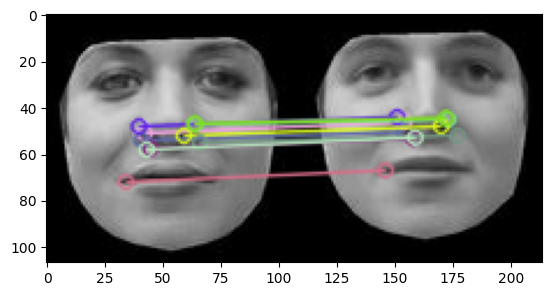

In [8]:
# Load images
img1 = cv.imread('images/surprised1.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('images/surprised2.jpg', cv.IMREAD_GRAYSCALE)
# Initialize ORB detector
orb = cv.ORB_create()

# Detect keypoints and compute descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

'''
normType: One of NORM_L1, NORM_L2, NORM_HAMMING, NORM_HAMMING2. L1 and L2 norms are preferable choices 
for SIFT and SURF descriptors.

NORM_HAMMING should be used with ORB, BRISK and BRIEF.

NORM_HAMMING2 should be used with ORB when WTA_K==3 or 4 (see ORB::ORB constructor description).

crossCheck: If it is false, this is will be default BFMatcher behaviour when it finds the k nearest neighbors 
for each query descriptor. 

If crossCheck==true, then the knnMatch() method with k=1 will only return pairs (i,j) 
such that for i-th query descriptor the j-th descriptor in the matcher's collection is the nearest and vice versa, 
i.e. the BFMatcher will only return consistent pairs. 

Such technique usually produces best results with minimal number of outliers when there are enough matches. 
This is alternative to the ratio test, used by D. Lowe in SIFT paper.
'''

# Create a Brute-Force Matcher object and use HAMMING Distance, it is more suitable in case of ORB,
'''
crossCheck=True allows us to use knnMatch() method with k=1 will only return pairs (i,j) 
such that for i-th query descriptor the j-th descriptor in the matcher's collection.
If you want to use knnMatch with other k values, then crossCheck = False and use knnMatch() separated as follows in the
next example.

'''

bf = cv.BFMatcher(normType = cv.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)
print(matches)
# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)
print(len(matches))
# Draw the top 10 matches
img_matches = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], img2, flags=2)

plt.imshow(img_matches[:,:,::-1])


In the following example, we will use the K-means with k>1, the the crossCheck=False in the BFMatcher(). The K-means gives number of matches of each keypoint in the original images according to k value. Then, apply the ratio test. This test ckecks that the 1st and 2nd match should if they are very close. its steps as follows:

- <i>Find Nearest Neighbors:<i>
  <br>For each descriptor in the source image, find the two nearest neighbors in the target image. This gives you two distances: d1 (distance to the closest neighbor) and d2 (distance to the second closest neighbor). 
    
<br>  
    Note, 
    <ol>
        <Li>The distance is typically measured using Euclidean distance or some other metric appropriate for the descriptor type.</Li>
<Li> d1 and d2 provide a measure of similarity between descriptors. Smaller distances indicate higher similarity.</Li>
</ol>
        <br>    

- <i>Find Nearest Neighbors:<i>  
  Calculate the ratio of these two distances: ratio = d1 / d2. 
<br>
    
- <i>Apply the Threshold:<i>  
    <ul>
  <Li>If the ratio is less than a predefined threshold (typically 0.75), consider it a good match. Otherwise, discard the match.</Li>
<Li>This threshold means that the closest match is significantly better than the second closest match, indicating a more reliable match.</Li>
 </ul>  


46 5


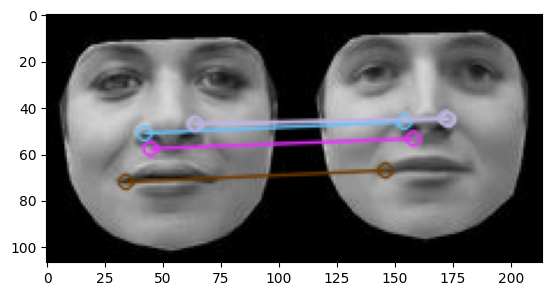

In [10]:
# Create a Brute-Force Matcher object
'''
If you want to use knnMatch with other k values, then crossCheck = False and use knnMatch() separated as follows in the
next example.

'''
bf = cv.BFMatcher(normType = cv.NORM_HAMMING )

# Find the top 2 matches for each descriptor.
matches = bf.knnMatch(des1, des2, k=2)
#print(matches)
# Apply the ratio test
good_matches = []

for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good_matches.append(m)
print(len(matches), len(good_matches))

# Draw the good matches
img_matches = cv.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img_matches[:,:,::-1])


## FLNN (Fast Library for Approximate Nearest Neighbors)

It is a library designed for fast approximate nearest neighbor searches in high-dimensional spaces. It is widely used in computer vision for tasks like feature matching, where you need to find the closest or most similar features between two sets of features extracted from images. FLANN is optimized for large datasets and high-dimensional data, making it suitable for real-time applications.

<b>Key Concepts in FLANN<b/>

<b>Approximate Nearest Neighbor Search:</b>
        Instead of finding the exact nearest neighbors, FLANN finds approximate nearest neighbors, which significantly 
        speeds up the search process while maintaining a high level of accuracy.
        This trade-off between speed and accuracy is controlled by various parameters in FLANN.

<b>Multiple Indexing Algorithms:</b>
        FLANN includes several indexing algorithms, such as KD-Trees, hierarchical clustering trees, and others, to handle 
        different types of data efficiently.
        The library can automatically select the best algorithm and parameters for a given dataset through a process called
        "automatic tuning."

<b>High-Dimensional Data Handling:</b>
        FLANN is particularly effective for high-dimensional data, such as the descriptors used in image feature matching 
        (e.g., SIFT, SURF, ORB descriptors).
 
    
 

<b>Note:</b>
   
The <b>FlannBasedMatcher</b> class in OpenCV is used to perform fast approximate nearest neighbor searches. This class leverages the FLANN (Fast Library for Approximate Nearest Neighbors) library, which supports various indexing algorithms. When initializing a FlannBasedMatcher object, you can specify several parameters to control the indexing and search process.


<b>FlannBasedMatcher Parameters</b><br>
    
<ul>
<li><b>indexParams:</b> A dictionary specifying the algorithm and its parameters used for indexing.
       
- <i>KD-Tree (FLANN_INDEX_KDTREE)</i>
    
    algorithm: 1 (Specifies the use of KD-Tree algorithm)
    
    trees: Number of trees in the KD-Tree. Increasing this value improves the search accuracy but increases the 
    search time.

<code>index_params = dict(algorithm=1, trees=5)</code> <br>
    

- <i>KMeans Tree (FLANN_INDEX_KMEANS)</i>
    
     algorithm: 2 (Specifies the use of KMeans Tree algorithm)
      
     branching: The branching factor (number of branches at each node).
    
     iterations: The number of iterations to perform in each k-means clustering.
    
     centers_init: The method to initialize the centers (0 for random, 1 for kmeans++).
            
<code>index_params = dict(algorithm=2, branching=32, iterations=5, centers_init=0)</code>
    
 
<br><li><b>Search Parameters:</b>
    
    The searchParams dictionary specifies parameters related to the search process itself. These parameters control the 
    search's accuracy and speed.
        
    - checks: The number of times the tree(s) in the index should be recursively traversed. Higher values result in 
      better precision but slower searches. 
        
    
<code>search_params = dict(checks=50)</code>    
</ul>

In [58]:
import cv2
import numpy as np

# Load the images in grayscale
img1 = cv2.imread('images/surprised1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('images/surprised2.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect key points and compute descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [59]:
FLANN_INDEX_KDTREE = 1

index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # Number of times the tree(s) in the index should be recursively traversed

print(index_params)
print(search_params)

# Initialize the FLANN-based matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match the descriptors
matches = flann.knnMatch(des1, des2, k=2)

# Apply the ratio test as per Lowe's paper to filter out false matches
good_matches = []
for m, n in matches:
    #To obtain the deistaces between the keypoint with the keypoint in the original image
    #print(m.distance)
    #print(n.distance)
    if m.distance < 0.65 * n.distance:
        good_matches.append(m)
        #To obtain the keypoints places.
        #print(np.float32([ kp1[m.queryIdx].pt for m in good_matches]))
        #print(np.float32([ kp2[m.trainIdx].pt for m in good_matches]))
    
    print()
   
             

# Draw matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


{'algorithm': 1, 'trees': 5}
{'checks': 50}





































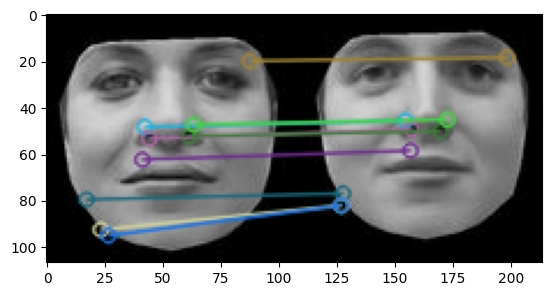

In [60]:
plt.imshow(img_matches[:,:,::-1])


## Homography in Computer Vision

Homography is a powerful tool in computer vision for mapping points between two planes. It is widely used in various applications such as image stitching, perspective correction, and augmented reality. It represents a transformation mapping points from one plane to another.

<i> Definition of Homography</i>
A homography is a projective transformation represented by a 3x3 matrix that maps points in one image to corresponding points in another image. Mathematically, it can be expressed as:

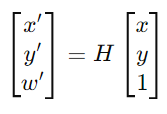

where 
𝐻
H is the homography matrix:

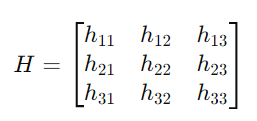

Given a point (𝑥,𝑦) (x,y) in the source image, the corresponding point (𝑥′,𝑦′) in the destination image is obtained by normalizing the result:

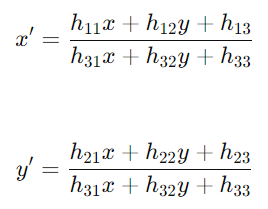

<i>Estimating Homography</i>
Homography is estimated using corresponding points between two images. OpenCV provides the findHomography function to compute this matrix using point correspondences.


<b>The process involves:</b>
- Detecting features
- Matching features.
- Computing the homography matrix to transform images.

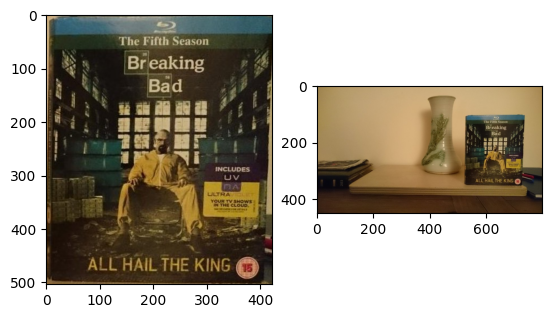

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
img1 = cv2.imread('./images/bb.jpg')
img2 = cv2.imread('./images/color1_small.jpg')


f, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img1[:,:,::-1])
ax2.imshow(img2[:,:,::-1])

In [7]:
## Step1 Detecting features
# Detect ORB keypoints and descriptors
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)


## Step2 Matching features

FLANN_INDEX_KDTREE = 1

index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # Number of times the tree(s) in the index should be recursively traversed

# Initialize the FLANN-based matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match the descriptors
matches = flann.knnMatch(des1, des2, k=2)

# Apply the ratio test as per Lowe's paper to filter out false matches
good_matches = []
for m, n in matches:
    if m.distance < 0.65 * n.distance:
        good_matches.append(m)

#Step3 Computing the homography matrix to transform images.

# Extract location of good matches
points1 = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
points2 = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Find homography
H, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
mask_matches = mask.ravel().tolist()

# Warp the image
h, w, channels = img2.shape

#Obtin the 1st image in the 2nd image dimenstions
img1_warped = cv2.warpPerspective(img1, H, (w, h))



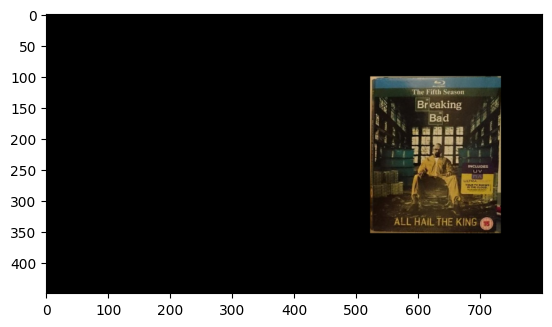

In [8]:
plt.imshow(img1_warped[:,:,::-1])


In [10]:
# Draw the matches that passed the ratio test.
img_matches = cv2.drawMatches( img1, kp1, img2, kp2, good_matches, None,
                              matchColor=(0, 255, 0), singlePointColor=None,
                              matchesMask=mask_matches, flags=2)

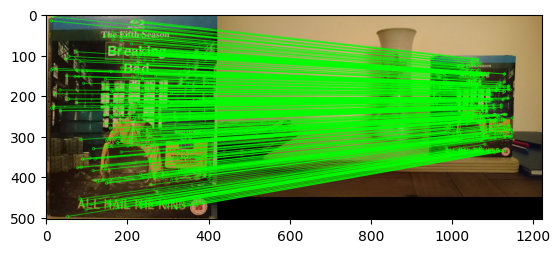

In [11]:
plt.imshow(img_matches[:,:,::-1])


Referrences:

    - https://youtu.be/Z_HwkG90Yvw
        